# Tarefa 1

1.Cite 5 diferenças entre o RandomForest e o AdaBoost.

2.Acesse o link https://scikit-learn.org/stable/modules/ensemble.html, leia a explicação (traduza se for preciso) e crie um jupyternotebook contendo o exemplo do AdaBoost.

3.Cite 5 Hyperparametrosimportantes no AdaBoost.

4.(Opcional) Utilize o GridSearchpara encontrar os melhores hyperparametrospara o conjunto de dados do exemplo (load_iris).

# 1. 5 diferenças

Random Forest e AdaBoost são dois algoritmos de aprendizado de máquina populares que são usados ​​para construir modelos de classificação e regressão. Aqui estão cinco diferenças entre eles:

1. Método de construção de modelo: O Random Forest é um algoritmo de conjunto baseado em árvore que combina várias árvores de decisão independentes para construir um modelo mais forte. Já o AdaBoost é um algoritmo de conjunto baseado em peso que usa várias versões do mesmo modelo de base para construir um modelo mais forte.

2. Seleção de características: O Random Forest seleciona um subconjunto aleatório de características em cada divisão de árvore para garantir que cada árvore no conjunto seja diferente. Já o AdaBoost atribui pesos às características com base em seu desempenho e dá mais peso às características que funcionaram bem nas iterações anteriores.

3. Sensibilidade ao ruído: O Random Forest é menos sensível ao ruído do que o AdaBoost, o que significa que o desempenho do Random Forest é mais robusto em dados com ruído. Já o AdaBoost pode ser mais propenso a sobreajuste em dados com ruído.

4. Velocidade de treinamento: O Random Forest é geralmente mais rápido para treinar do que o AdaBoost, pois cada árvore pode ser construída independentemente das outras. Já o AdaBoost requer várias iterações para ajustar os pesos das instâncias e obter o modelo final.

5. Paralelização: O Random Forest pode ser facilmente paralelizado em várias CPUs, pois cada árvore pode ser construída independentemente. Já o AdaBoost é mais difícil de paralelizar, pois cada iteração depende dos resultados da iteração anterior.

# 2. Exemplos AdaBoost

##### Árvores de decisão AdaBoosted de várias classes

Este exemplo reproduz a Figura 1 de Zhu et al [1] e mostra como o aumento pode Melhore a precisão da previsão em um problema de várias classes. A classificação O conjunto de dados é construído tomando uma distribuição normal padrão de dez dimensões e definição de três classes separadas por dez dimensões concêntricas aninhadas esferas tais que números aproximadamente iguais de amostras estão em cada classe (quantis da distribuição).

A atuação da SAMME e da SAMME. Os algoritmos R [1] são comparados. SAMME. R usa as estimativas de probabilidade para atualizar o modelo aditivo, enquanto o SAMME usa apenas as classificações. Como ilustra o exemplo, a SAMME. Algoritmo R normalmente converge mais rápido do que o SAMME, obtendo um erro de teste menor com menos impulsionando iterações. O erro de cada algoritmo no conjunto de teste após cada impulsionando a iteração é mostrado à esquerda, o erro de classificação no teste conjunto de cada árvore é mostrado no meio, e o peso de aumento de cada árvore é mostrado à direita. Todas as árvores têm um peso de um na SAMME. Algoritmo R e portanto, não são mostrados.

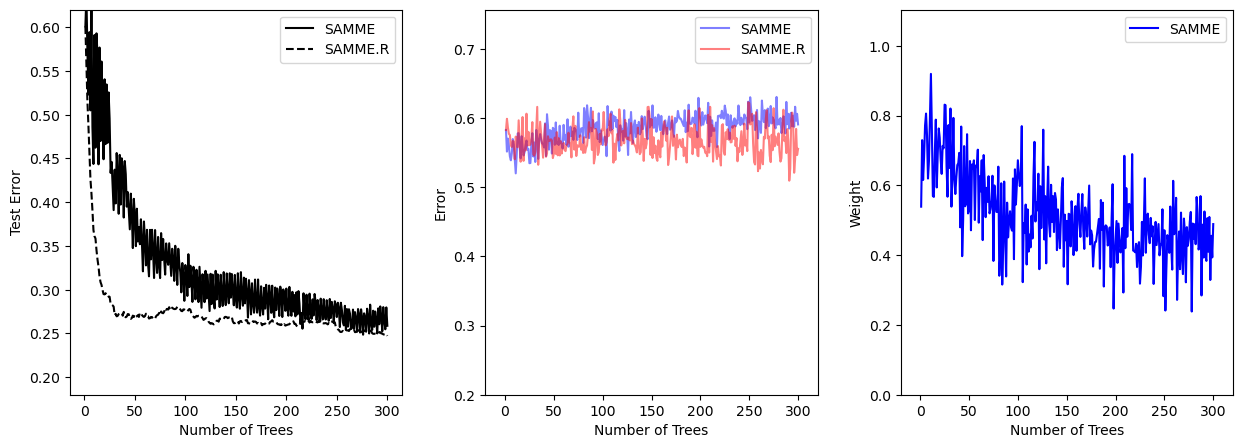

In [9]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_gaussian_quantiles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


X, y = make_gaussian_quantiles(
    n_samples=13000, n_features=10, n_classes=3, random_state=1
)

n_split = 3000

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

bdt_real = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300, learning_rate=1
)

bdt_discrete = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=300,
    learning_rate=1.5,
    algorithm="SAMME",
)

bdt_real.fit(X_train, y_train)
bdt_discrete.fit(X_train, y_train)

real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
    bdt_real.staged_predict(X_test), bdt_discrete.staged_predict(X_test)
):
    real_test_errors.append(1.0 - accuracy_score(real_test_predict, y_test))
    discrete_test_errors.append(1.0 - accuracy_score(discrete_test_predict, y_test))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1), discrete_test_errors, c="black", label="SAMME")
plt.plot(
    range(1, n_trees_real + 1),
    real_test_errors,
    c="black",
    linestyle="dashed",
    label="SAMME.R",
)
plt.legend()
plt.ylim(0.18, 0.62)
plt.ylabel("Test Error")
plt.xlabel("Number of Trees")

plt.subplot(132)
plt.plot(
    range(1, n_trees_discrete + 1),
    discrete_estimator_errors,
    "b",
    label="SAMME",
    alpha=0.5,
)
plt.plot(
    range(1, n_trees_real + 1), real_estimator_errors, "r", label="SAMME.R", alpha=0.5
)
plt.legend()
plt.ylabel("Error")
plt.xlabel("Number of Trees")
plt.ylim((0.2, max(real_estimator_errors.max(), discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))

plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights, "b", label="SAMME")
plt.legend()
plt.ylabel("Weight")
plt.xlabel("Number of Trees")
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

##### Two-class AdaBoost

Este exemplo se ajusta a um toco de decisão AdaBoosted em um separável não linearmente conjunto de dados de classificação composto por dois clusters de "quantis gaussianos" (ver ) e traça a decisão limites e pontuações de decisão. As distribuições dos escores de decisão são mostradas separadamente para amostras das classes A e B. O rótulo de classe previsto para cada A amostra é determinada pelo sinal da pontuação de decisão. Amostras com decisão escores maiores que zero são classificados como B, sendo classificados de outra forma como A. A magnitude de um escore de decisão determina o grau de semelhança com o rótulo de classe prevista. Além disso, um novo conjunto de dados poderia ser construído contendo uma pureza desejada da classe B, por exemplo, selecionando apenas amostras com escore de decisão acima de algum valor.

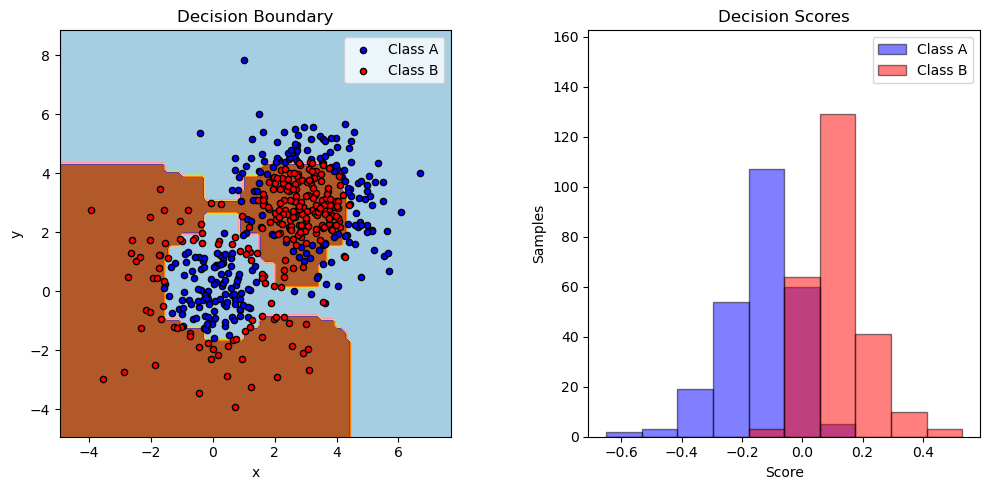

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.inspection import DecisionBoundaryDisplay


# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

bdt.fit(X, y)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))

# Plot the decision boundaries
ax = plt.subplot(121)
disp = DecisionBoundaryDisplay.from_estimator(
    bdt,
    X,
    cmap=plt.cm.Paired,
    response_method="predict",
    ax=ax,
    xlabel="x",
    ylabel="y",
)
x_min, x_max = disp.xx0.min(), disp.xx0.max()
y_min, y_max = disp.xx1.min(), disp.xx1.max()
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")

plt.title("Decision Boundary")

# Plot the two-class decision scores
twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(
        twoclass_output[y == i],
        bins=10,
        range=plot_range,
        facecolor=c,
        label="Class %s" % n,
        alpha=0.5,
        edgecolor="k",
    )
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc="upper right")
plt.ylabel("Samples")
plt.xlabel("Score")
plt.title("Decision Scores")

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

##### Regressão da árvore de decisão com o AdaBoost

Uma árvore de decisão é impulsionada usando o algoritmo AdaBoost.R2 [1] em um 1D conjunto de dados senoidal com uma pequena quantidade de ruído gaussiano. 299 impulsos (300 árvores de decisão) são comparados com uma única árvore de decisão Regressor. À medida que o número de impulsos é aumentado, o regressor pode se encaixar mais detalhe.

In [11]:
import numpy as np

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

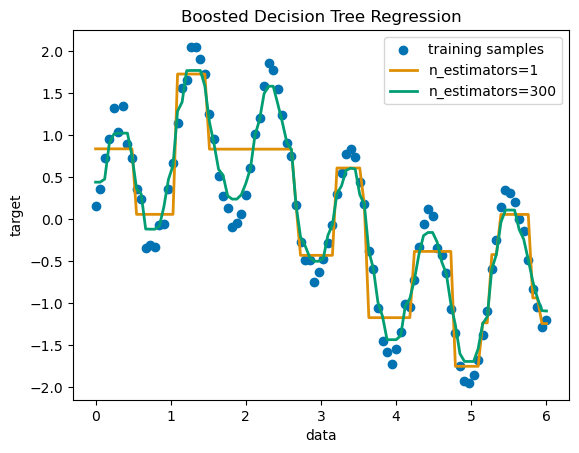

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()


# 3. 5 hyperparametros importantes no adaboost

O AdaBoost é um algoritmo de aprendizado de máquina que requer a definição de vários hiperparâmetros para ser executado adequadamente. Aqui estão cinco hiperparâmetros importantes do AdaBoost:

1. **n_estimators:**  n_estimators : int, padrão=50
O número máximo de estimadores em que o aumento é encerrado. Em caso de encaixe perfeito, o procedimento de aprendizagem é interrompido precocemente. Os valores devem estar no intervalo .[1, inf)

2. **learning_rate:** learning_rate : float, padrão=1.0
Peso aplicado a cada regressor em cada iteração de reforço. Um maior A taxa de aprendizagem aumenta a contribuição de cada regressor. Há um trade-off entre os parâmetros e . Os valores devem estar no intervalo .learning_raten_estimators(0.0, in

3. **base_estimator:** base_estimator : objeto, default=Nenhum
O estimador de base a partir do qual o conjunto impulsionado é construído. Se , então o estimador base é inicializado com .Nonemax_depth=3

4. **max_depth:** O hiperparâmetro max_depth controla a profundidade máxima da árvore de decisão. Esse hiperparâmetro pode ajudar a evitar o sobreajuste, limitando o número de recursos que o modelo pode considerar durante o treinamento.

5. **min_samples_split:** Esse hiperparâmetro define o número mínimo de amostras necessárias para dividir um nó em uma árvore de decisão. Um valor baixo pode levar a overfitting, enquanto um valor alto pode tornar a árvore muito rasa e incapaz de aprender com dados mais complexos.

6. **random_state:** random_state : int, instância RandomState ou None, default=None
Controla a semente aleatória dada em cada em cada impulsionando a iteração. Assim, ele só é usado quando expõe um . Além disso, ele controla o bootstrap dos pesos usados para treinar a cada iteração de impulsionamento. Passe um int para saída reproduzível em várias chamadas de função. Veja Glossário.estimatorestimatorrandom_stateestimator

7. loss{'linear', 'quadrado', 'exponencial'}, default='linear'
A função de perda a ser usada ao atualizar os pesos após cada impulsionando a iteração.

8. Número mínimo de amostras em uma folha (**min_samples_leaf**): É o número mínimo de amostras necessárias em uma folha da árvore. Valores menores podem levar a um overfitting, enquanto valores maiores podem impedir a árvore de aprender padrões importantes nos dados. 

A escolha adequada dos hiperparâmetros é crucial para obter um modelo preciso e geral no AdaBoost. A seleção de hiperparâmetros geralmente é feita por meio de validação cruzada, que envolve a avaliação de várias configurações de hiperparâmetros em diferentes subconjuntos de dados de treinamento e teste.

Tree: 0.0255 (error) = 0.0003 (bias^2)  + 0.0152 (var) + 0.0098 (noise)
Bagging(Tree): 0.0196 (error) = 0.0004 (bias^2)  + 0.0092 (var) + 0.0098 (noise)


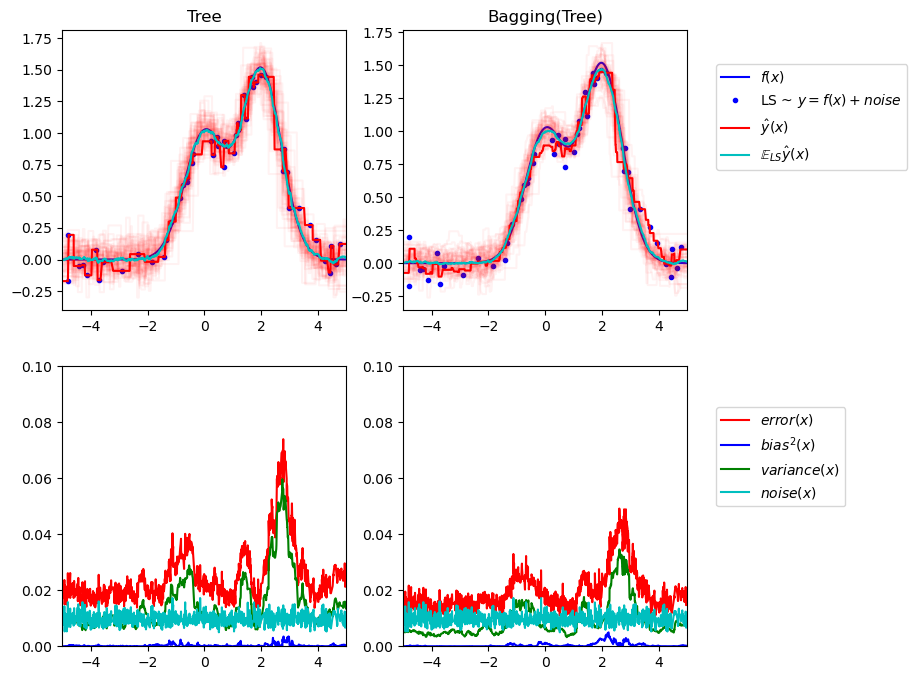

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of iterations for computing expectations
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [
    ("Tree", DecisionTreeRegressor()),
    ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor())),
]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(10, 8))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= n_repeat * n_repeat

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)
        )
    )

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()

The mean squared error (MSE) on test set: 3053.1466


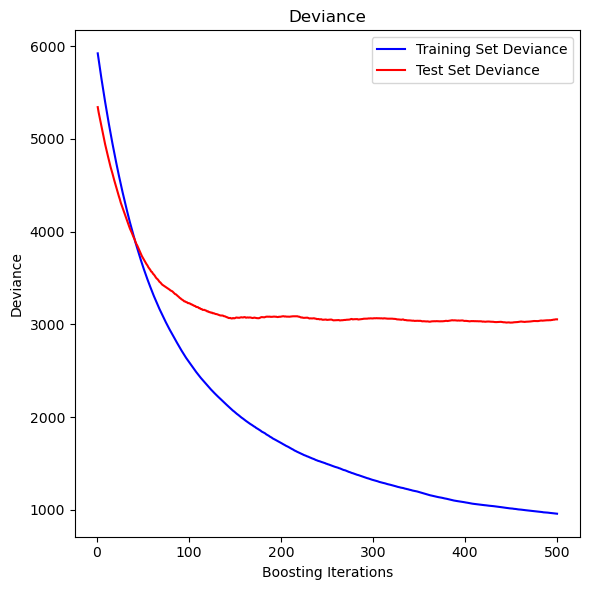

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np

X = np.array([0, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 0, 1, 1]

gbdt = HistGradientBoostingClassifier(min_samples_leaf=1).fit(X, y)
gbdt.predict(X)

X = np.array([0, np.nan, 1, 2, np.nan]).reshape(-1, 1)
y = [0, 1, 0, 0, 1]
gbdt = HistGradientBoostingClassifier(min_samples_leaf=1,
                                      max_depth=2,
                                      learning_rate=1,
                                      max_iter=1).fit(X, y)
gbdt.predict(X)

X = [[1, 0],
     [1, 0],
     [1, 0],
     [0, 1]]
y = [0, 0, 1, 0]
# ignore the first 2 training samples by setting their weight to 0
sample_weight = [0, 0, 1, 1]
gb = HistGradientBoostingClassifier(min_samples_leaf=1)
gb.fit(X, y, sample_weight=sample_weight)

gb.predict([[1, 0]])

gb.predict_proba([[1, 0]])[0, 1]

0.9990209190235209

# 4. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.04) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]


In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [ ]:
X, y = load_diabetes(return_X_y=True)

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, y)
reg2.fit(X, y)
reg3.fit(X, y)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [ ]:
xt = X[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

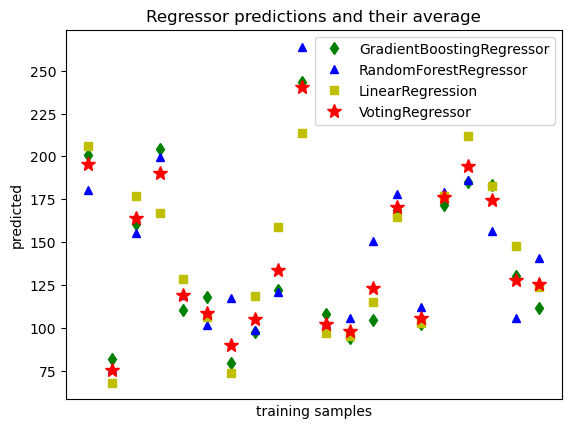

In [ ]:
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()